In [2]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [4]:
import pandas as pd
import matplotlib as mt

df = pd.read_csv("https://raw.githubusercontent.com/coooodek/requestLog/refs/heads/main/dataset/processedData.csv", dtype={"분기": "int32", "연도": "int32"})

df['요청일'] = pd.to_datetime(df['요청일'])

In [5]:
df2 = df.groupby(['연도']).size()

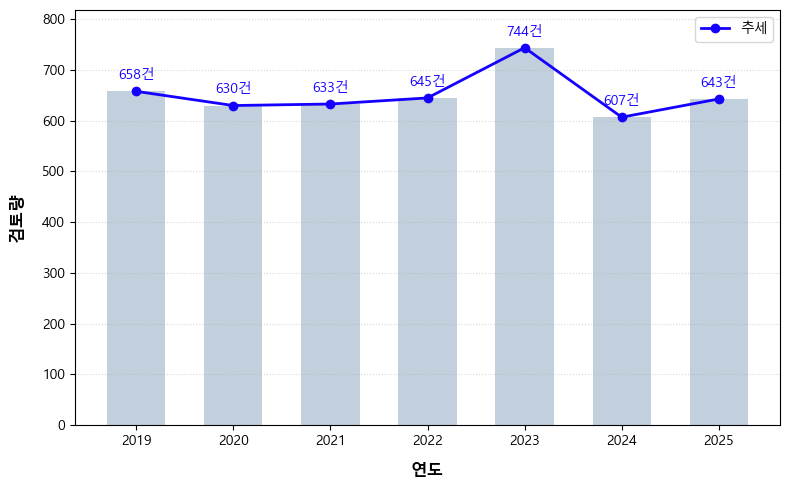

In [6]:
# 기술 검토 접수 건수 통계

plt.figure(figsize = (8,5))

plt.bar(df2.index, df2.values,
    width = 0.6,
    color = "#9ab0c699")

plt.plot(df2.index, df2.values,
    marker = 'o',
    color = "#1500ff",
    linewidth = 2,
    label = '추세')

for x, y in zip(df2.index, df2.values):
    plt.text(x, y + 18, f'{y}건',
             ha='center',
             va='bottom',
             color = "#1500ff")

plt.xlabel('연도', fontsize = 12, labelpad = 11, fontweight = 'bold')
plt.ylabel('검토량', fontsize = 12, labelpad = 11, fontweight = 'bold')
plt.ylim(0, (df2.values.max()) * 1.1) 

plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

In [7]:
output = (df.groupby(['제품그룹', '연도']).size().unstack(fill_value=0))

In [8]:
output

연도,2019,2020,2021,2022,2023,2024,2025
제품그룹,,,,,,,
A,5,2,3,10,15,12,22
B,23,26,21,30,33,16,27
C,34,33,49,27,28,30,36
D,25,39,52,42,39,44,38
E,104,98,111,94,132,102,131
ETC,8,4,4,5,0,1,6
F,9,12,9,15,7,27,25
G,70,57,47,80,82,57,67
H,9,9,9,6,4,18,8


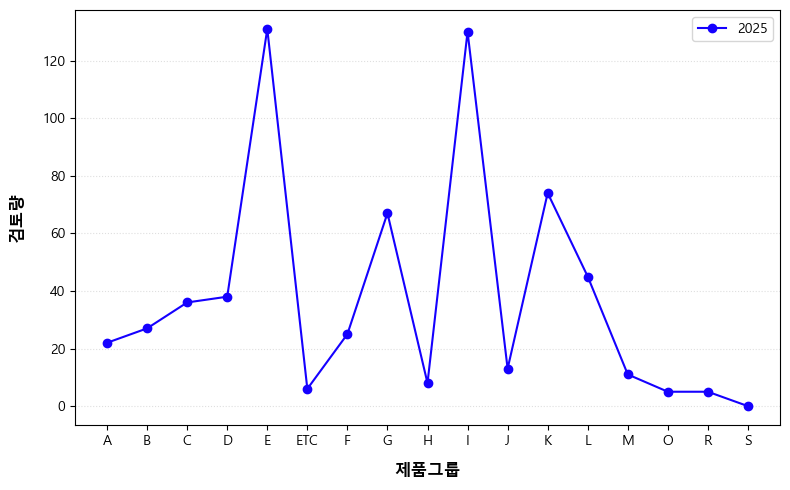

In [10]:
plt.figure(figsize=(8, 5))

for year in output.columns[-1:]:
    plt.plot(
        output.index,
        output[year],
        marker = 'o',
        linewidth = 1.5,
        color = "#1500ff",
        label = str(year)
    )

plt.xlabel('제품그룹', fontsize = 12, labelpad = 11, fontweight = 'bold')
plt.ylabel('검토량', fontsize = 12, labelpad = 11, fontweight = 'bold')

plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()